Todo:
- better updating for pcolor
- timer issues with multiprocessing

In [1]:
import squidpy
import pylab as pl
%matplotlib inline
instruments = squidpy.get_instruments()

In [2]:
instruments

mock1,"['time', 'voltage', 'wave']"
mock2,"['time', 'voltage', 'wave']"


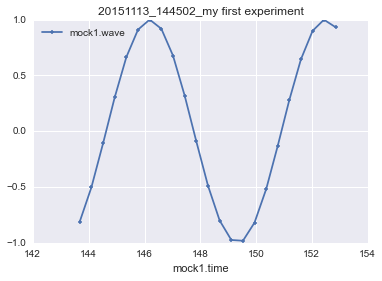

In [9]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments)
test.watch(10)
test.run()

test.plot('mock1.time','mock1.wave',style='.-')
while test.running:
    test.update_plot()

In [12]:
title = 'my first experiment'
test = squidpy.Experiment(title, instruments)

test.sweep('mock2.voltage')[0:10:1]
test.sweep('mock1.voltage')[0:.1:.01]
test.measure()

instruments.mock1.time = 0
test.run()

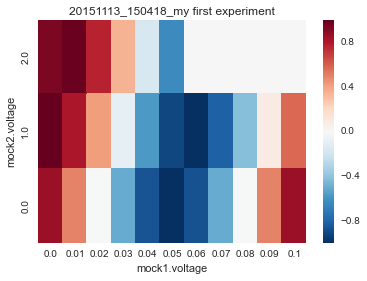

In [ ]:
test.pcolor('mock1.voltage','mock2.voltage','mock2.wave')
while test.running:
    test.update_plot()

In [ ]:
instruments.mock1.voltage

In [43]:
instruments.s.close()